<a href="https://colab.research.google.com/github/Imkaran04/Cleantech_Solar_Internship_Assignment/blob/main/Cleantech_Solar_Internship_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

In [15]:
# Load the dataset
data = pd.read_excel("Assignment_Dataset.xlsx")
data.head(5)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [16]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
# Calculate the 30-day moving average of the Performance Ratio (PR)
data['Moving Average'] = data['PR'].rolling(window=30).mean()

In [18]:
# Define the budget line values
budget_values = [73.9, 73.3, 72.7]


In [19]:
# Define colors for GHI levels
colors = ['navy', 'lightblue', 'orange', 'brown']
cmap = mcolors.ListedColormap(colors)




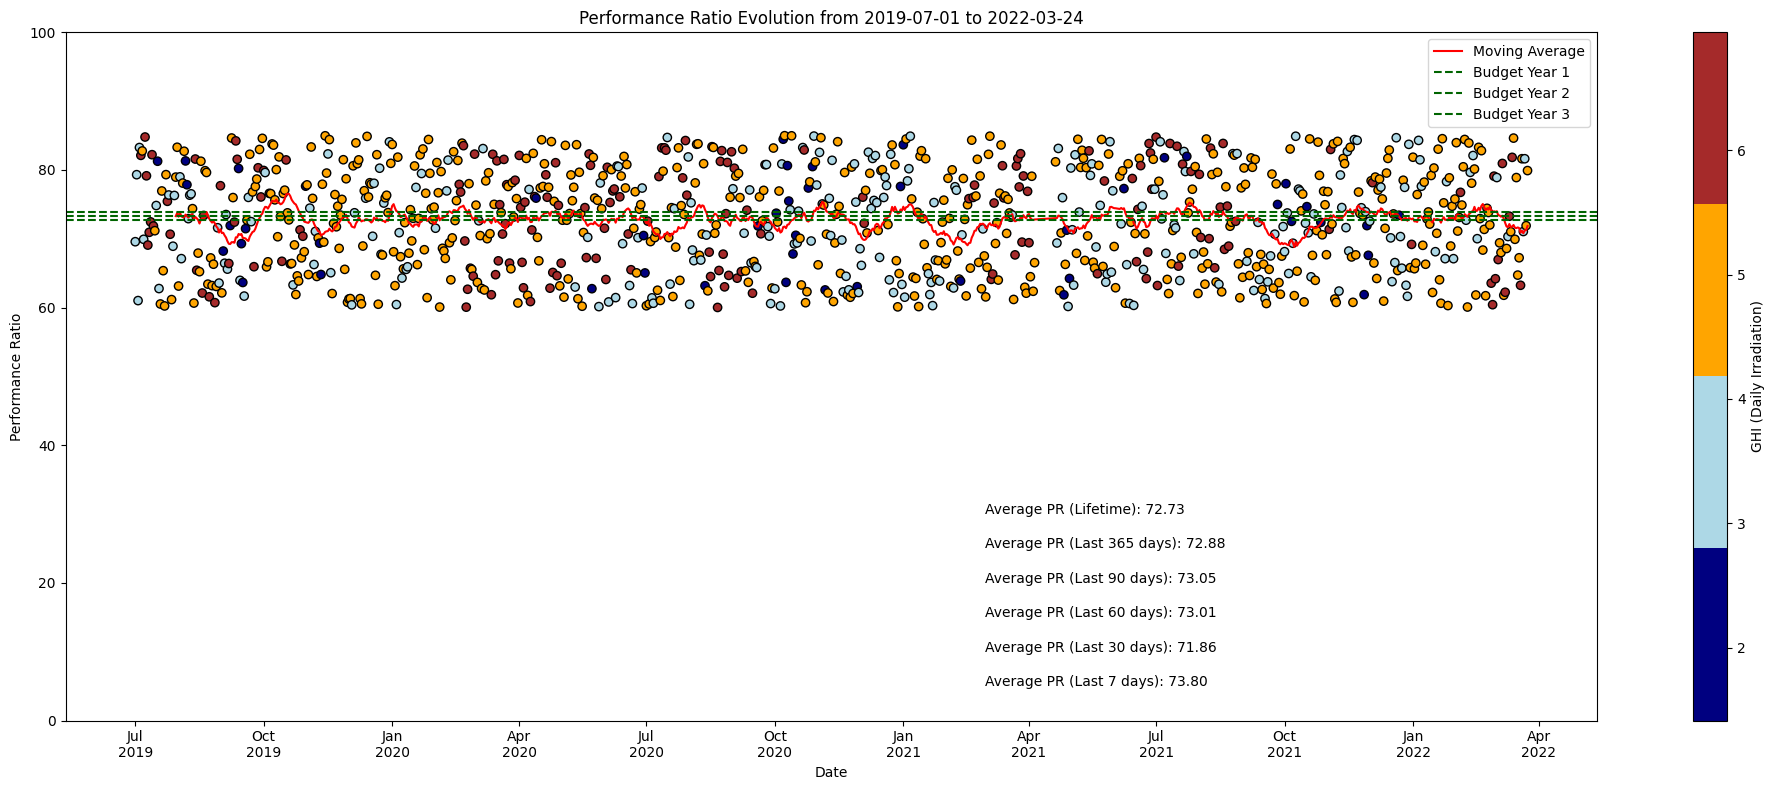

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# Read the dataset
data = pd.read_excel('Assignment_Dataset.xlsx')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the 30-day moving average
data['Moving Average'] = data['PR'].rolling(window=30).mean()

# Define the budget line values
budget_values = [73.9, 73.3, 72.7]

# Define colors for GHI levels
colors = ['navy', 'lightblue', 'orange', 'brown']
cmap = mcolors.ListedColormap(colors)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 8))
scatter = ax.scatter(data['Date'], data['PR'], c=data['GHI'], cmap=cmap, edgecolors='black')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GHI (Daily Irradiation)')

# Add the moving average line
ax.plot(data['Date'], data['Moving Average'], color='red', label='Moving Average')

# Add the budget line
for i, value in enumerate(budget_values):
    ax.axhline(y=value, color='darkgreen', linestyle='--', label=f'Budget Year {i+1}')

# Set x-axis date formatting
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[7, 10, 1, 4]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


# Set y-axis range
ax.set_ylim([0, 100])

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Performance Ratio')
ax.set_title('Performance Ratio Evolution from 2019-07-01 to 2022-03-24')

# Show the average PR values
ax.text(0.6, 0.05, f'Average PR (Last 7 days): {data["PR"].tail(7).mean():.2f}', transform=ax.transAxes)
ax.text(0.6, 0.1, f'Average PR (Last 30 days): {data["PR"].tail(30).mean():.2f}', transform=ax.transAxes)
ax.text(0.6, 0.15, f'Average PR (Last 60 days): {data["PR"].tail(60).mean():.2f}', transform=ax.transAxes)
ax.text(0.6, 0.2, f'Average PR (Last 90 days): {data["PR"].tail(90).mean():.2f}', transform=ax.transAxes)
ax.text(0.6, 0.25, f'Average PR (Last 365 days): {data["PR"].tail(365).mean():.2f}', transform=ax.transAxes)
ax.text(0.6, 0.3, f'Average PR (Lifetime): {data["PR"].mean():.2f}', transform=ax.transAxes)

# Adjust layout and display the graph
plt.tight_layout()
plt.show()
